In [14]:
import numpy as np
from scipy.stats import norm, chi2
import matplotlib.pyplot as plt
import pandas as pd

# Zadanie 1

## Treść

Z populacji generalnej o rozkładzie normalnym N (μ, 0.2) pobrano próbę <i>(dane 1)</i>. Na poziomie istotności $\alpha = 0.05$ zweryfikuj hipotezy:
- $\mu = 1.5$,
- $\mu \gt 1.5$,
- $\mu \lt 1.5$.

Narysuj odpowiednie obszary kytyczne i wyznacz p-wartości dla każdej z powyższych hipotez.
Odpowiedz na pytanie co stanie się kiedy zwiększymy bądź zmniejszymy poziom ufności.

## Rozwiązanie

Rozpocznijmy od wczytania danych

In [79]:
data = np.loadtxt("lista8_zad1.txt")

Definiujemy parametry zadania 

In [80]:
mu_0 = 1.5
sigma = 0.2
alpha = 0.05

Rozpoczynamy od wyznaczenia danych próby

In [81]:
sample_mean = np.mean(data)
sample_size = len(data)

print("--------------------------")
print(f"Średnia próby: {sample_mean}")
print(f"n: {sample_size}")
print("--------------------------")
sample_mean, sample_size

--------------------------
Średnia próby: 1.45546595425
n: 1000
--------------------------


(1.45546595425, 1000)

Wyznaczamy wartość statystyki testowej ze wzoru:

$$
z = \frac{\bar{X} - \mu_0}{\sigma} \cdot  \sqrt{n}
$$

gdzie:
- $\bar{X}$ - średnia próby
- $\mu_0$ - wartość oczekiwana w hipotezie zerowej
- $\sigma$ - odchylenie standardowe populacji
- $n$ - liczebność próby

In [82]:
z = (sample_mean - mu_0) / (sigma / np.sqrt(sample_size))
z

-7.041450899607091

### 1) $H_1$

Teraz dla poziomu istotności $\alpha = 0.05$ (co oznacza, że akceptujemy maksymalne 5% ryzyko popełnienia błędu I rodzaju) obliczamy wartość krytyczną $z$.<br>

In [104]:
# Wartości krytyczne i wartości p
z_critical = norm.ppf(1 - alpha / 2)
p_value = 2 * (1 - norm.cdf(abs(z)))
z_critical, p_value

(1.959963984540054, 1.9024781749976682e-12)

Przedstawmy rezultaty na wykresie

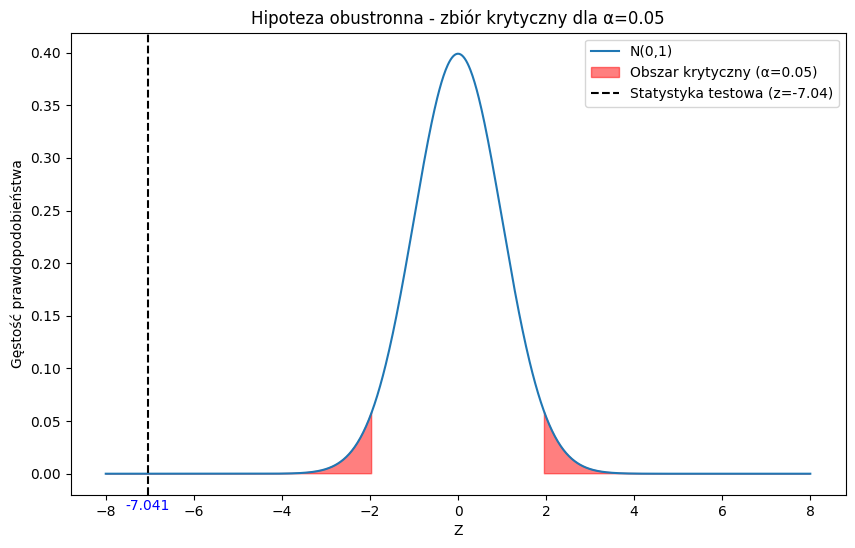

In [105]:
x = np.linspace(-8, 8, 1000)
y = norm.pdf(x)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, label='N(0,1)')
ax.fill_between(x, 0, y, where=(x <= -z_critical) | (x >= z_critical), color='red', alpha=0.5, label='Obszar krytyczny (α=0.05)')
ax.axvline(x=z, color='black', linestyle='--', label=f'Statystyka testowa (z={z:.2f})')
ax.text(z, -0.01, f'{z:.3f}', horizontalalignment='center', verticalalignment='top', color='blue', fontsize=10, transform=ax.get_xaxis_transform())      #zobacz czy z tym
ax.legend()
ax.set_xlabel('Z')
ax.set_ylabel('Gęstość prawdopodobieństwa')
ax.set_title('Hipoteza obustronna - zbiór krytyczny dla α=0.05')

plt.show()

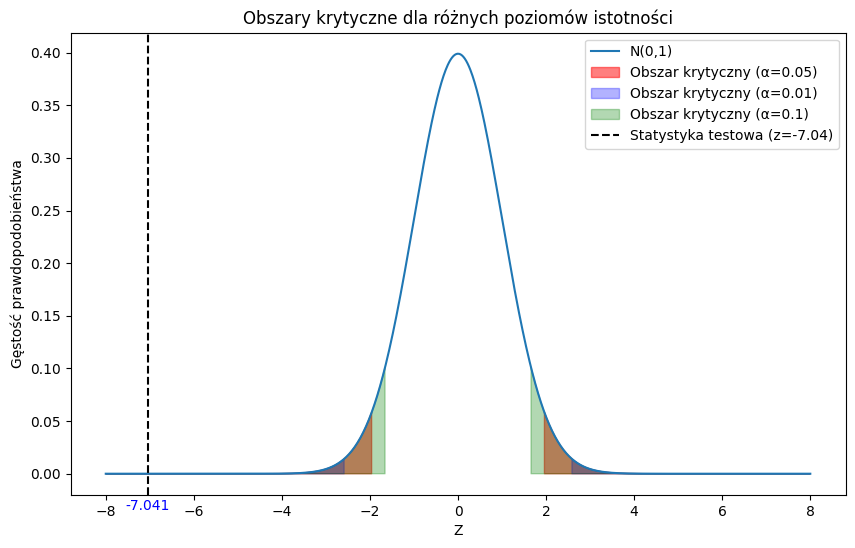

(1.45546595425,
 1000,
 -7.041450899607091,
 1.959963984540054,
 1.9024781749976682e-12,
 2.5758293035489004,
 1.9024781749976682e-12,
 1.6448536269514722,
 1.9024781749976682e-12)

In [106]:
# Dla alpha = 0.01
alpha_01 = 0.01
z_critical_01 = norm.ppf(1 - alpha_01/2)
p_value_01 = 2 * (1 - norm.cdf(abs(z)))

# Dla alpha = 0.1
alpha_1 = 0.1
z_critical_1 = norm.ppf(1 - alpha_1/2)
p_value_1 = 2 * (1 - norm.cdf(abs(z)))

x = np.linspace(-8, 8, 1000)
y = norm.pdf(x)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, y, label='N(0,1)')
ax.fill_between(x, 0, y, where=(x <= -z_critical) | (x >= z_critical), color='red', alpha=0.5, label='Obszar krytyczny (α=0.05)')
ax.fill_between(x, 0, y, where=(x <= -z_critical_01) | (x >= z_critical_01), color='blue', alpha=0.3, label='Obszar krytyczny (α=0.01)')
ax.fill_between(x, 0, y, where=(x <= -z_critical_1) | (x >= z_critical_1), color='green', alpha=0.3, label='Obszar krytyczny (α=0.1)')
ax.axvline(x=z, color='black', linestyle='--', label=f'Statystyka testowa (z={z:.2f})')
ax.text(z, -0.01, f'{z:.3f}', horizontalalignment='center', verticalalignment='top', color='blue', fontsize=10, transform=ax.get_xaxis_transform())      #zobacz czy z tym
ax.legend()
ax.set_xlabel('Z')
ax.set_ylabel('Gęstość prawdopodobieństwa')
ax.set_title('Obszary krytyczne dla różnych poziomów istotności')

plt.show()

sample_mean, sample_size, z, z_critical, p_value, z_critical_01, p_value_01, z_critical_1, p_value_1

### 2) $H_2$

In [107]:
alpha = 0.05
z_critical = norm.ppf(1 - alpha)
p_value = 1 - norm.cdf(z)
z_critical, p_value

(1.6448536269514722, 0.9999999999990488)

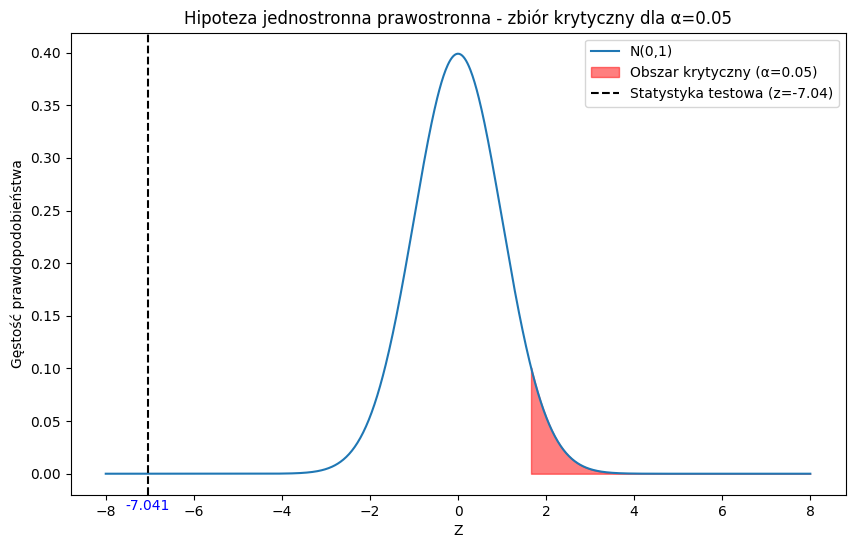

In [108]:
x = np.linspace(-8, 8, 1000)
y = norm.pdf(x)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, y, label='N(0,1)')
ax.fill_between(x, 0, y, where=(x >= z_critical), color='red', alpha=0.5, label='Obszar krytyczny (α=0.05)')
ax.axvline(x=z, color='black', linestyle='--', label=f'Statystyka testowa (z={z:.2f})')
ax.text(z, -0.01, f'{z:.3f}', horizontalalignment='center', verticalalignment='top', color='blue', fontsize=10, transform=ax.get_xaxis_transform())      #zobacz czy z tym
ax.legend()
ax.set_xlabel('Z')
ax.set_ylabel('Gęstość prawdopodobieństwa')
ax.set_title('Hipoteza jednostronna prawostronna - zbiór krytyczny dla α=0.05')

plt.show()

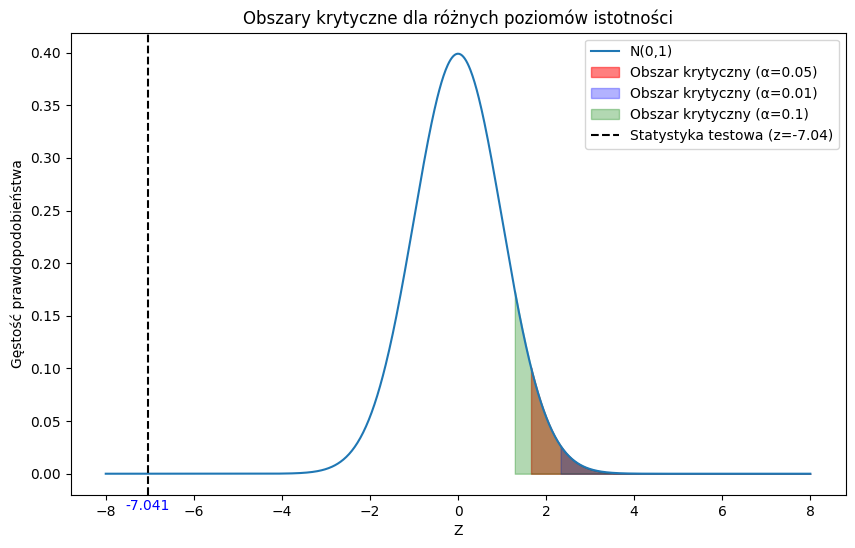

(1.45546595425,
 1000,
 -7.041450899607091,
 1.6448536269514722,
 0.9999999999990488,
 2.3263478740408408,
 0.9999999999990488,
 1.2815515655446004,
 0.9999999999990488)

In [109]:
# For alpha = 0.01
alpha_01 = 0.01
z_critical_01 = norm.ppf(1 - alpha_01)
p_value_01 = 1 - norm.cdf(z)

# For alpha = 0.1
alpha_1 = 0.1
z_critical_1 = norm.ppf(1 - alpha_1)
p_value_1 = 1 - norm.cdf(z)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, y, label='N(0,1)')
ax.fill_between(x, 0, y, where=(x >= z_critical), color='red', alpha=0.5, label='Obszar krytyczny (α=0.05)')
ax.fill_between(x, 0, y, where=(x >= z_critical_01), color='blue', alpha=0.3, label='Obszar krytyczny (α=0.01)')
ax.fill_between(x, 0, y, where=(x >= z_critical_1), color='green', alpha=0.3, label='Obszar krytyczny (α=0.1)')
ax.axvline(x=z, color='black', linestyle='--', label=f'Statystyka testowa (z={z:.2f})')
ax.text(z, -0.01, f'{z:.3f}', horizontalalignment='center', verticalalignment='top', color='blue', fontsize=10, transform=ax.get_xaxis_transform())      #zobacz czy z tym
ax.legend()
ax.set_xlabel('Z')
ax.set_ylabel('Gęstość prawdopodobieństwa')
ax.set_title('Obszary krytyczne dla różnych poziomów istotności')

plt.show()
sample_mean, sample_size, z, z_critical, p_value, z_critical_01, p_value_01, z_critical_1, p_value_1

### 3) $H_3$

In [110]:
alpha = 0.05
z_critical = norm.ppf(alpha)
p_value = norm.cdf(z)
z_critical, p_value

(-1.6448536269514729, 9.51241291241344e-13)

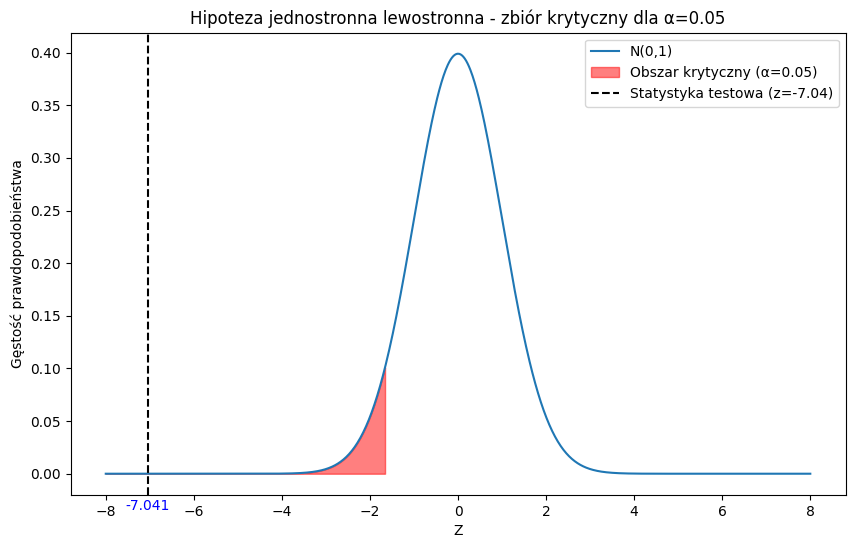

In [112]:
alpha_01 = 0.01
z_critical_01 = norm.ppf(alpha_01)
p_value_01 = norm.cdf(z)

x = np.linspace(-8, 8, 1000)
y = norm.pdf(x)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, y, label='N(0,1)')
ax.fill_between(x, 0, y, where=(x <= z_critical), color='red', alpha=0.5, label='Obszar krytyczny (α=0.05)')
ax.axvline(x=z, color='black', linestyle='--', label=f'Statystyka testowa (z={z:.2f})')
ax.text(z, -0.01, f'{z:.3f}', horizontalalignment='center', verticalalignment='top', color='blue', fontsize=10, transform=ax.get_xaxis_transform())      #zobacz czy z tym
ax.legend()
ax.set_xlabel('Z')
ax.set_ylabel('Gęstość prawdopodobieństwa')
ax.set_title('Hipoteza jednostronna lewostronna - zbiór krytyczny dla α=0.05')

plt.show()

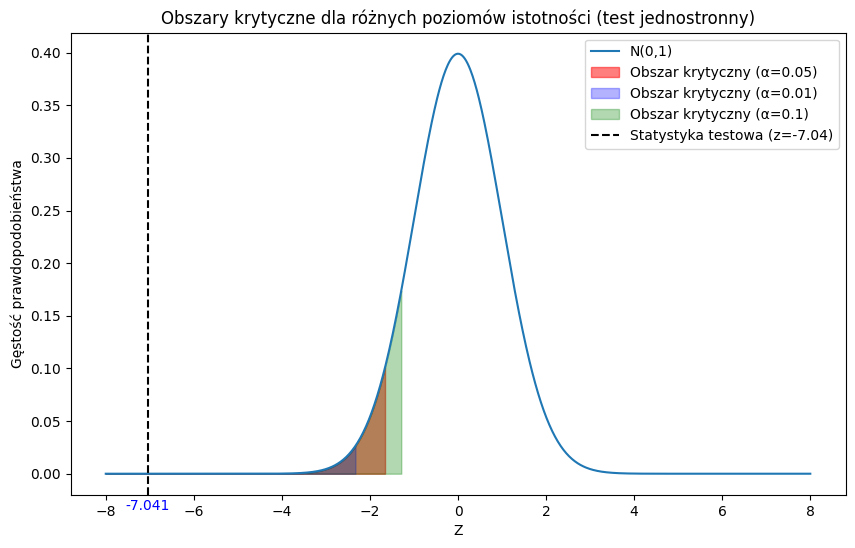

(1.45546595425,
 1000,
 -7.041450899607091,
 -1.6448536269514729,
 9.51241291241344e-13,
 -2.3263478740408408,
 9.51241291241344e-13,
 -1.2815515655446004,
 9.51241291241344e-13)

In [113]:
# For alpha = 0.1
alpha_1 = 0.1
z_critical_1 = norm.ppf(alpha_1)
p_value_1 = norm.cdf(z)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, y, label='N(0,1)')
ax.fill_between(x, 0, y, where=(x <= z_critical), color='red', alpha=0.5, label='Obszar krytyczny (α=0.05)')
ax.fill_between(x, 0, y, where=(x <= z_critical_01), color='blue', alpha=0.3, label='Obszar krytyczny (α=0.01)')
ax.fill_between(x, 0, y, where=(x <= z_critical_1), color='green', alpha=0.3, label='Obszar krytyczny (α=0.1)')
ax.axvline(x=z, color='black', linestyle='--', label=f'Statystyka testowa (z={z:.2f})')
ax.text(z, -0.01, f'{z:.3f}', horizontalalignment='center', verticalalignment='top', color='blue', fontsize=10, transform=ax.get_xaxis_transform())
ax.legend()
ax.set_xlabel('Z')
ax.set_ylabel('Gęstość prawdopodobieństwa')
ax.set_title('Obszary krytyczne dla różnych poziomów istotności (test jednostronny)')

plt.show()

sample_mean, sample_size, z, z_critical, p_value, z_critical_01, p_value_01, z_critical_1, p_value_1

# Zadanie 2

## Treść

Z populacji generalnej o rozkładzie normalnym $N(0.2, \sigma^2)$ pobrano próbę <i>(dane 2)</i>. Na poziomie istotności $\alpha = 0.05$ zweryfikuj hipotezy:
- $\sigma^2 \ne 1.5$,
- $\sigma^2 \gt 1.5$,
- $\sigma^2 \lt 1.5$.

Narysuj odpowiednie obszary kytyczne i wyznacz p-wartości dla każdej z powyższych hipotez.
Odpowiedz na pytanie co stanie się kiedy zwiększymy bądź zmniejszymy poziom ufności.

## Rozwiązanie

Tutaj również rozpoczniemy od wczytania danych:

In [3]:
dane2 = np.loadtxt("lista8_zad2.txt")

I rozpoczynamy od wyznaczenia danych próby:

In [5]:
zad2_sample_size = len(dane2)
zad2_sample_mean = np.mean(dane2)
zad2_sample_variance = np.var(dane2, ddof=1)

print("--------------------------")
print(f"Wariancja próby: {zad2_sample_variance}")
print(f"Średnia próby: {zad2_sample_mean}")
print(f"n: {zad2_sample_size}")
print("--------------------------")

--------------------------
Wariancja próby: 1.6681207941464067
Średnia próby: 0.24916501030311
n: 1000
--------------------------


Naszą hipotezą zerową $H_0$ dla każdego z tych przypadków będzie

$$
H_0: \sigma^2 = 1.5
$$

In [6]:
zad2_h0 = 1.5

Wyznaczamy wartość statystyki testowej ze wzoru:

$$
\chi^2 = \frac{(n - 1) \cdot s^2}{\sigma_0^2}
$$

gdzie:
- $\chi^2$ - wartość statystyki chi-kwadrat
- $n$ - liczba obserwacji w próbie
- $s^2$ - wariancja próbki
- $\sigma_0^2$ - wartość wariancji w hipotezie zerowej

In [14]:
chi_squared_statistic = (zad2_sample_size - 1) * zad2_sample_variance / zad2_h0
chi_squared_statistic

1110.968448901507

### 1) $H_1$

In [13]:
alpha_05 = 0.05

critical_values = [chi2.ppf(alpha_05 / 2, zad2_sample_size - 1), chi2.ppf(1 - alpha_05 / 2, zad2_sample_size - 1)]
p_value = 2 * (1 - chi2.cdf(abs(chi_squared_statistic), zad2_sample_size - 1))

critical_values, p_value

([913.3009983021134, 1088.4870677259353], 0.015023252487834649)

Przedstawmy rezultaty na wykresie

<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_145184/1444302677.py:6: SyntaxWarning: invalid escape sequence '\c'
  ax.plot(x, y, 'b-', label=f"$\chi^2$($n = {zad2_sample_size-1}$)")
/tmp/ipykernel_145184/1444302677.py:8: SyntaxWarning: invalid escape sequence '\c'
  ax.axvline(x=chi_squared_statistic, color='black', linestyle='--', label=f'Statystyka testowa ($\chi^2$={chi_squared_statistic:.2f})')


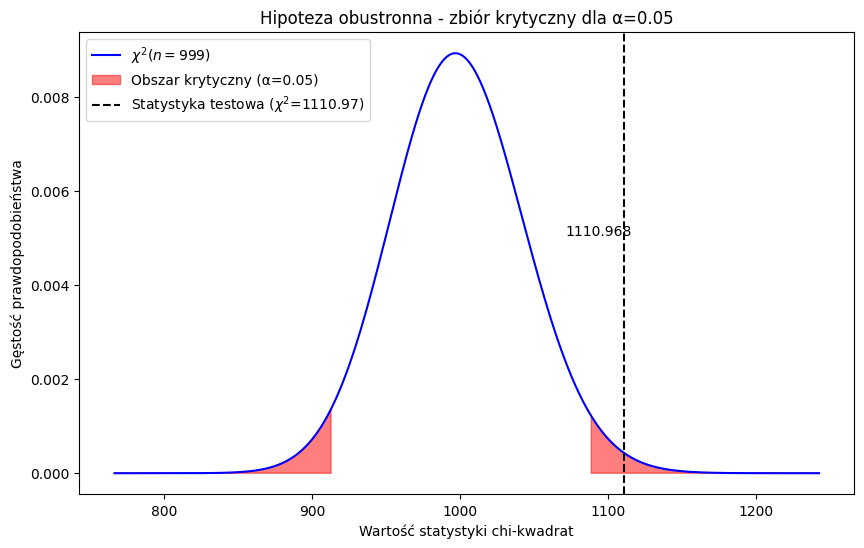

In [48]:
x = np.linspace(chi2.ppf(0.001, zad2_sample_size - 1) - 100, chi2.ppf(0.999, zad2_sample_size - 1) + 100, 1000)
y = chi2.pdf(x, zad2_sample_size - 1)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, y, 'b-', label=f"$\chi^2$($n = {zad2_sample_size-1}$)")
ax.fill_between(x, 0, y, where=(x <= critical_values[0]) | (x >= critical_values[1]), color='red', alpha=0.5, label='Obszar krytyczny (α=0.05)')
ax.axvline(x=chi_squared_statistic, color='black', linestyle='--', label=f'Statystyka testowa ($\chi^2$={chi_squared_statistic:.2f})')
ax.text(chi_squared_statistic - 17, 0.005, f'{chi_squared_statistic:.3f}', horizontalalignment='center', verticalalignment='bottom', color='black', fontsize=10)
ax.legend()
ax.set_xlabel('Wartość statystyki chi-kwadrat')
ax.set_ylabel('Gęstość prawdopodobieństwa')
ax.set_title('Hipoteza obustronna - zbiór krytyczny dla α=0.05')

plt.show()

<>:16: SyntaxWarning: invalid escape sequence '\c'
<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:16: SyntaxWarning: invalid escape sequence '\c'
<>:20: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_145184/2273565075.py:16: SyntaxWarning: invalid escape sequence '\c'
  ax.plot(x, y, 'b-', label=f"$\chi^2$($n = {zad2_sample_size-1}$)")
/tmp/ipykernel_145184/2273565075.py:20: SyntaxWarning: invalid escape sequence '\c'
  ax.axvline(x=chi_squared_statistic, color='black', linestyle='--', label=f'Statystyka testowa ($\chi^2$={chi_squared_statistic:.2f})')


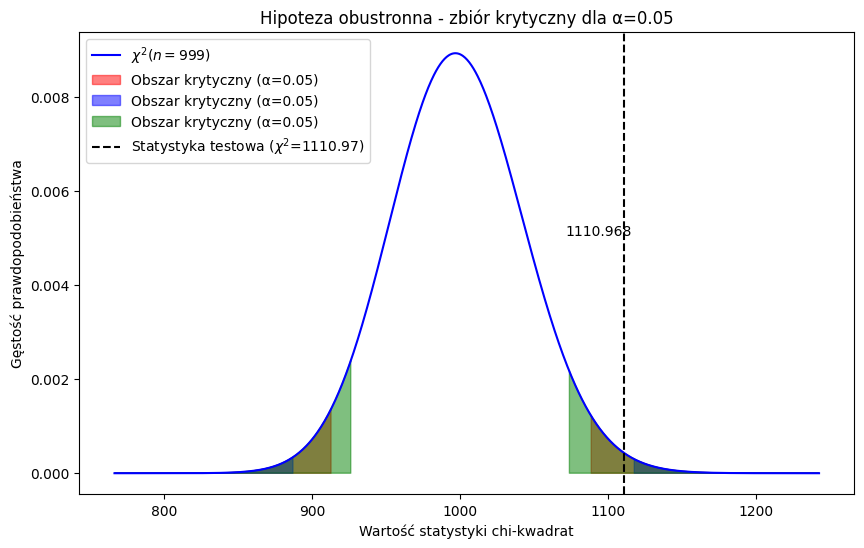

(0.24916501030311,
 1000,
 1110.968448901507,
 0.015023252487834649,
 [913.3009983021134, 1088.4870677259353],
 [887.6211352175186, 1117.890452678641],
 [926.6311609204329, 1073.6426506574246])

In [47]:
# Dla alpha = 0.01
alpha_01 = 0.01
critical_values_01 = [chi2.ppf(alpha_01 / 2, zad2_sample_size - 1), chi2.ppf(1 - alpha_01 / 2, zad2_sample_size - 1)]
p_value_01 = 2 * (1 - chi2.cdf(abs(chi_squared_statistic), zad2_sample_size - 1))

# Dla alpha = 0.1
alpha_1 = 0.1
critical_values_1 = [chi2.ppf(alpha_1 / 2, zad2_sample_size - 1), chi2.ppf(1 - alpha_1 / 2, zad2_sample_size - 1)]
p_value_1 = 2 * (1 - chi2.cdf(abs(chi_squared_statistic), zad2_sample_size - 1))

x = np.linspace(chi2.ppf(0.001, zad2_sample_size - 1) - 100, chi2.ppf(0.999, zad2_sample_size - 1) + 100, 1000)
y = chi2.pdf(x, zad2_sample_size - 1)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, y, 'b-', label=f"$\chi^2$($n = {zad2_sample_size-1}$)")
ax.fill_between(x, 0, y, where=(x <= critical_values[0]) | (x >= critical_values[1]), color='red', alpha=0.5, label='Obszar krytyczny (α=0.05)')
ax.fill_between(x, 0, y, where=(x <= critical_values_01[0]) | (x >= critical_values_01[1]), color='blue', alpha=0.5, label='Obszar krytyczny (α=0.05)')
ax.fill_between(x, 0, y, where=(x <= critical_values_1[0]) | (x >= critical_values_1[1]), color='green', alpha=0.5, label='Obszar krytyczny (α=0.05)')
ax.axvline(x=chi_squared_statistic, color='black', linestyle='--', label=f'Statystyka testowa ($\chi^2$={chi_squared_statistic:.2f})')
ax.text(chi_squared_statistic - 17, 0.005, f'{chi_squared_statistic:.3f}', horizontalalignment='center', verticalalignment='bottom', color='black', fontsize=10)
ax.legend()
ax.set_xlabel('Wartość statystyki chi-kwadrat')
ax.set_ylabel('Gęstość prawdopodobieństwa')
ax.set_title('Obszary krytyczne dla różnych poziomów istotności')

plt.show()

zad2_sample_mean, zad2_sample_size, chi_squared_statistic, p_value, critical_values, critical_values_01, critical_values_1

# Zadanie 3

# a) dla hipotez z 1 zadania

## - błędy 1 rodzaju

### boxploty dla $\alpha=0.05$ wersja nr 1 XDDD

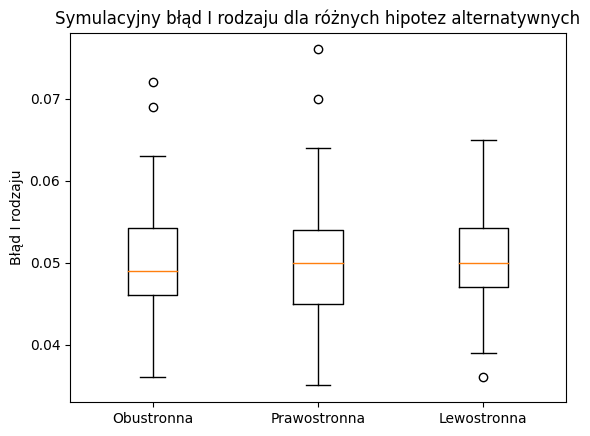

In [121]:
# Funkcja do wielokrotnego przeprowadzenia symulacji
def multiple_simulations(mu_0, sigma, alpha, n, N, M, alternative='two-sided'):
    errors = np.zeros(M)
    for _ in range(M):
        error = simulate_type_I_error(mu_0, sigma, alpha, n, N, alternative)
        errors[_] = error
    return errors

# Wielokrotne symulacje
M = 100
errors_two_sided = multiple_simulations(mu_0, sigma, alpha, n, N, M, 'two-sided')
errors_greater = multiple_simulations(mu_0, sigma, alpha, n, N, M, 'greater')
errors_less = multiple_simulations(mu_0, sigma, alpha, n, N, M, 'less')

# Wykres pudełkowy
plt.boxplot([errors_two_sided, errors_greater, errors_less], labels=['Obustronna', 'Prawostronna', 'Lewostronna'])
plt.ylabel('Błąd I rodzaju')
plt.title('Symulacyjny błąd I rodzaju dla różnych hipotez alternatywnych')
plt.show()

### błędy 1 rodzaju dla trzech alf

In [9]:
mu_0 = 1.5
sigma = 0.2
n = 1000
N = 1000  # liczba symulacji
alphas = [0.05, 0.01, 0.1]

# Funkcja do przeprowadzenia symulacji błędu I rodzaju
def simulate_type_I_error(mu_0, sigma, alpha, n, N, alternative='two-sided'):
    critical_value = norm.ppf(1 - alpha / 2) if alternative == 'two-sided' else norm.ppf(1 - alpha)
    count = 0
    
    for _ in range(N):
        sample = np.random.normal(mu_0, sigma, n)
        sample_mean = np.mean(sample)
        z = (sample_mean - mu_0) / (sigma / np.sqrt(n))
        
        if alternative == 'two-sided':
            if abs(z) > critical_value:
                count += 1
        elif alternative == 'greater':
            if z > critical_value:
                count += 1
        elif alternative == 'less':
            if z < -critical_value:
                count += 1
    
    return count / N

# Symulacja dla różnych poziomów istotności i różnych alternatyw
results = {}
for alpha in alphas:
    results[alpha] = {
        'two-sided': simulate_type_I_error(mu_0, sigma, alpha, n, N, 'two-sided'),
        'greater': simulate_type_I_error(mu_0, sigma, alpha, n, N, 'greater'),
        'less': simulate_type_I_error(mu_0, sigma, alpha, n, N, 'less')
    }

# Drukowanie wyników w formie tabeli
print("Błąd I rodzaju dla różnych poziomów istotności:")
print(f"{'Hipoteza':<20} {'α=0.05':<10} {'α=0.01':<10} {'α=0.1':<10}")
for alternative in ['two-sided', 'greater', 'less']:
    print(f"{alternative:<20} {results[0.05][alternative]:<10.4f} {results[0.01][alternative]:<10.4f} {results[0.1][alternative]:<10.4f}")

Błąd I rodzaju dla różnych poziomów istotności:
Hipoteza             α=0.05     α=0.01     α=0.1     
two-sided            0.0360     0.0090     0.0980    
greater              0.0360     0.0100     0.1100    
less                 0.0570     0.0060     0.0970    


### boxploty dla $\alpha=0.05$ wersja nr 2 (smieszne) XDDD

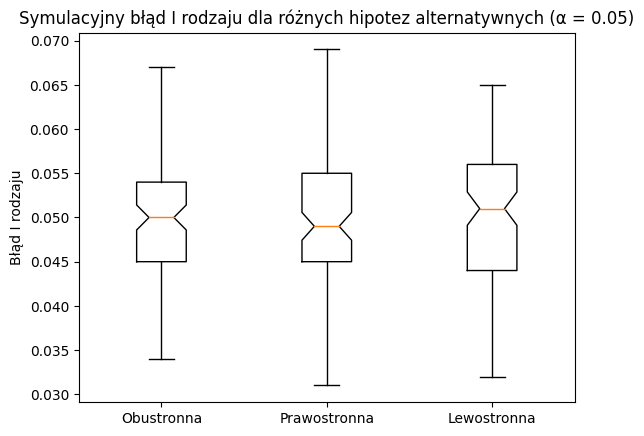

{0.05: {'two-sided': 0.036, 'greater': 0.036, 'less': 0.057},
 0.01: {'two-sided': 0.009, 'greater': 0.01, 'less': 0.006},
 0.1: {'two-sided': 0.098, 'greater': 0.11, 'less': 0.097}}

In [12]:
M = 100
alpha = 0.05
all_errors = {'two-sided': [], 'greater': [], 'less': []}

for _ in range(M):
    all_errors['two-sided'].append(simulate_type_I_error(mu_0, sigma, alpha, n, N, 'two-sided'))
    all_errors['greater'].append(simulate_type_I_error(mu_0, sigma, alpha, n, N, 'greater'))
    all_errors['less'].append(simulate_type_I_error(mu_0, sigma, alpha, n, N, 'less'))

# Wykres pudełkowy
labels = ['Obustronna', 'Prawostronna', 'Lewostronna']
data = [all_errors['two-sided'], all_errors['greater'], all_errors['less']]

plt.boxplot(data, labels=labels, notch=True)
plt.ylabel('Błąd I rodzaju')
plt.title('Symulacyjny błąd I rodzaju dla różnych hipotez alternatywnych (α = 0.05)')
plt.show()

results

## - błędy II rodzaju

Wyniki dla testu obustronnego:
      Błąd II rodzaju  Moc testu
1.47            0.002      0.998
1.48            0.140      0.860
1.49            0.650      0.350
1.51            0.650      0.350
1.52            0.127      0.873
1.53            0.002      0.998

Wyniki dla testu prawostronnego:
      Błąd II rodzaju  Moc testu
1.51            0.523      0.477
1.52            0.063      0.937
1.53            0.000      1.000

Wyniki dla testu lewostronnego:
      Błąd II rodzaju  Moc testu
1.47            0.002      0.998
1.48            0.071      0.929
1.49            0.506      0.494


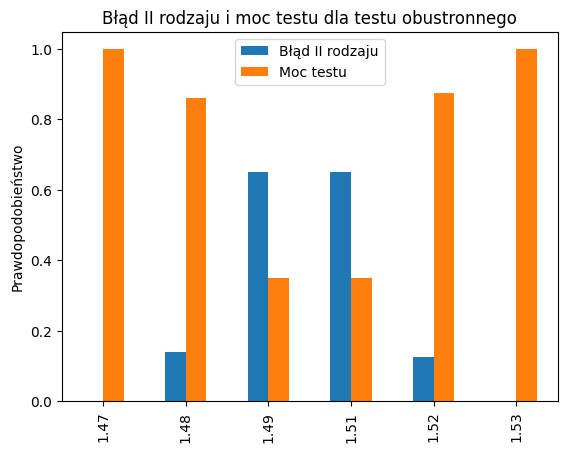

In [15]:
mu_0 = 1.5
sigma = 0.2
alpha = 0.05
n = 1000
N = 1000  # liczba symulacji
mus_two_sided = [1.47, 1.48, 1.49, 1.51, 1.52, 1.53]
mus_greater = [1.51, 1.52, 1.53]
mus_less = [1.47, 1.48, 1.49]

# Funkcja do przeprowadzenia symulacji błędu II rodzaju
def simulate_type_II_error(mu, sigma, alpha, n, N, mu_0=1.5, alternative='two-sided'):
    critical_value = norm.ppf(1 - alpha / 2) if alternative == 'two-sided' else norm.ppf(1 - alpha)
    count = 0
    
    for _ in range(N):
        sample = np.random.normal(mu, sigma, n)
        sample_mean = np.mean(sample)
        z = (sample_mean - mu_0) / (sigma / np.sqrt(n))
        
        if alternative == 'two-sided':
            if abs(z) <= critical_value:
                count += 1
        elif alternative == 'greater':
            if z <= critical_value:
                count += 1
        elif alternative == 'less':
            if z >= -critical_value:
                count += 1
    
    return count / N

# Symulacja dla różnych wartości mu
results_two_sided = {mu: simulate_type_II_error(mu, sigma, alpha, n, N, mu_0, 'two-sided') for mu in mus_two_sided}
results_greater = {mu: simulate_type_II_error(mu, sigma, alpha, n, N, mu_0, 'greater') for mu in mus_greater}
results_less = {mu: simulate_type_II_error(mu, sigma, alpha, n, N, mu_0, 'less') for mu in mus_less}

# Konwersja wyników do DataFrame
df_two_sided = pd.DataFrame.from_dict(results_two_sided, orient='index', columns=['Błąd II rodzaju'])
df_greater = pd.DataFrame.from_dict(results_greater, orient='index', columns=['Błąd II rodzaju'])
df_less = pd.DataFrame.from_dict(results_less, orient='index', columns=['Błąd II rodzaju'])

# Dodanie kolumny z mocą testu
df_two_sided['Moc testu'] = 1 - df_two_sided['Błąd II rodzaju']
df_greater['Moc testu'] = 1 - df_greater['Błąd II rodzaju']
df_less['Moc testu'] = 1 - df_less['Błąd II rodzaju']

# Wyświetlenie wyników
print("Wyniki dla testu obustronnego:")
print(df_two_sided)
print("\nWyniki dla testu prawostronnego:")
print(df_greater)
print("\nWyniki dla testu lewostronnego:")
print(df_less)

# Przykład wykresu dla testu obustronnego
df_two_sided.plot(kind='bar', title='Błąd II rodzaju i moc testu dla testu obustronnego')
plt.ylabel('Prawdopodobieństwo')
plt.show()